In [30]:
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

In [31]:
x = pd.read_csv('./clustering_dataset.csv')
x.head()

,Neighborhood,theft_from_vehicle_counts
0,Central Business District,23777
1,West End,6680
2,Mount Pleasant,4121
3,Strathcona,3439
4,Fairview,3427


In [32]:
x = x.dropna()

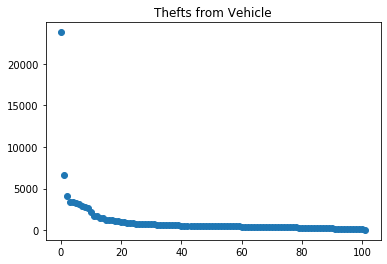

In [33]:
#Visualize the data
plt.plot() 
plt.title('Thefts from Vehicle') 
plt.scatter([i for i in range(len(x))], x['theft_from_vehicle_counts']) 
plt.show()

In [34]:
#one hot encode the data
one_hot_encoded = pd.get_dummies(x)

one_hot_encoded.head()

,theft_from_vehicle_counts,Neighborhood_Arbutus Ridge,Neighborhood_Central Business District,Neighborhood_Dunbar-Southlands,Neighborhood_Fairview,Neighborhood_Grandview-Woodland,Neighborhood_Hastings-Sunrise,Neighborhood_Kensington-Cedar Cottage,Neighborhood_Kerrisdale,Neighborhood_Killarney,...,Neighborhood_virginia-village,Neighborhood_washington-park,Neighborhood_washington-park-west,Neighborhood_washington-virginia-vale,Neighborhood_wellshire,Neighborhood_west-colfax,Neighborhood_west-highland,Neighborhood_westwood,Neighborhood_whittier,Neighborhood_windsor
0,23777,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6680,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4121,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3439,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3427,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#Try to find the best value of k now (part 1)
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(one_hot_encoded) 
    kmeanModel.fit(one_hot_encoded)     
      
    distortions.append(sum(np.min(cdist(one_hot_encoded, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / one_hot_encoded.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(one_hot_encoded, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / one_hot_encoded.shape[0] 
    mapping2[k] = kmeanModel.inertia_

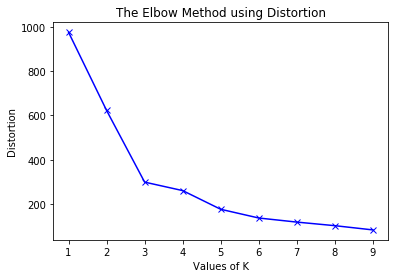

In [36]:
#code is from: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
#K elbow plot using distortion
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

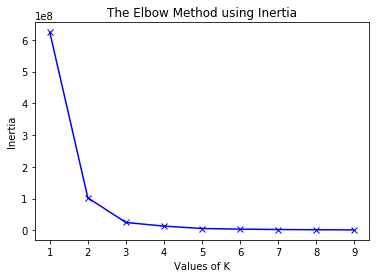

In [37]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [38]:
#After k = 3 is chosen
kmeanModel = KMeans(n_clusters=3).fit(one_hot_encoded) 
kmeanModel.fit(one_hot_encoded)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
x['cluster'] = kmeanModel.labels_
x.head()

,Neighborhood,theft_from_vehicle_counts,cluster
0,Central Business District,23777,1
1,West End,6680,2
2,Mount Pleasant,4121,2
3,Strathcona,3439,2
4,Fairview,3427,2


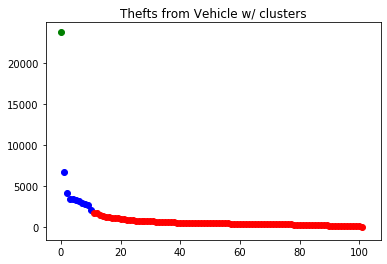

In [44]:
#Plot data with clusters
my_colors = {0:'red', 1:'green', 2:'blue'}
plt.plot()
plt.title('Thefts from Vehicle w/ clusters')

for idx, sample in enumerate(x.values):
    plt.scatter(idx, sample[1], color=my_colors.get(sample[2]))
        
plt.show()